### Sample code for visualizing the stroke data

In [12]:
import os
import ndjson
import numpy as np
import struct
from struct import unpack
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

### Helper functions

In [35]:
def image_grid(imgs, rows, cols):
    """
    Concatenates multiple images
    """
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

def draw_strokes(strokes, height=256, width=256):
    """
    Make a new PIL image with the given strokes
    """
    image = Image.new("RGB", (width, height), "white")
    image_draw = ImageDraw.Draw(image)

    for stroke in strokes:
        # concat x and y coordinates
        points = list(zip(stroke[0], stroke[1]))

        # draw all points
        # image_draw.point(points, fill=0)
        image_draw.line(points, fill=0)

    return image

### Load stroke data

In [152]:
# -------------------------------- #
category = "cat"
data_path = f"./data/{category}.ndjson"
# -------------------------------- #

with open(data_path, 'r') as f:
    data = ndjson.load(f)
    
print(f"[INFO] Loaded {category} data with {len(data)} items.")

[INFO] Loaded cat data with 123202 items.


### Draw strokes sequentially

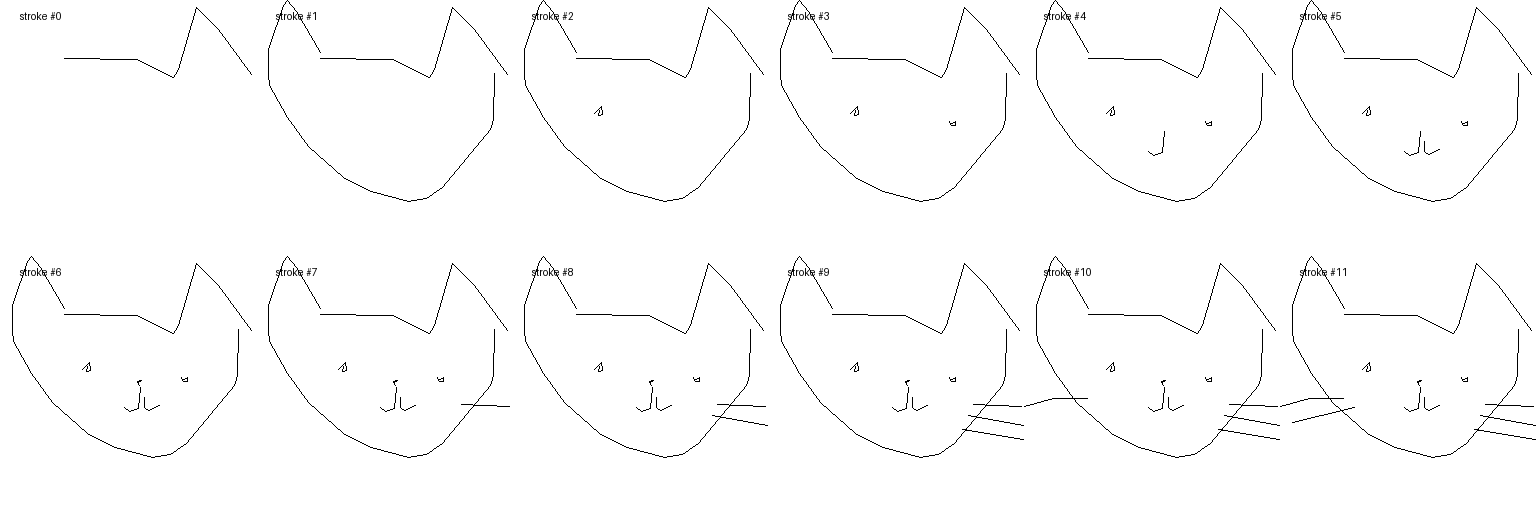

In [214]:
# set index of the item to visualize
idx = 120

# full sequence of strokes
item = data[idx]
strokes = item['drawing']

# sequence of strokes up to the current stroke
images = []
for i in range(len(strokes)):
    image = draw_strokes(strokes[:i+1])

    # add stroke number
    draw = ImageDraw.Draw(image)
    draw.text((20, 10), text=f"stroke #{i}", fill="black")
    images.append(image)

# concatenate all images
images_concat = image_grid(images, 1, len(images))
images_concat